Energy demand of the system: 100 W
Battery Pack Mass: 1440.00 kg
Total Energy:      144000 Wh
Energy demand of the system: 200 W
Battery Pack Mass: 2880.00 kg
Total Energy:      288000 Wh
Energy demand of the system: 300 W
Battery Pack Mass: 4320.00 kg
Total Energy:      432000 Wh
Energy demand of the system: 400 W
Battery Pack Mass: 5760.00 kg
Total Energy:      576000 Wh
Energy demand of the system: 500 W
Battery Pack Mass: 7200.00 kg
Total Energy:      720000 Wh
Energy demand of the system: 600 W
Battery Pack Mass: 8640.00 kg
Total Energy:      864000 Wh
Energy demand of the system: 700 W
Battery Pack Mass: 10080.00 kg
Total Energy:      1008000 Wh
Energy demand of the system: 800 W
Battery Pack Mass: 11520.00 kg
Total Energy:      1152000 Wh


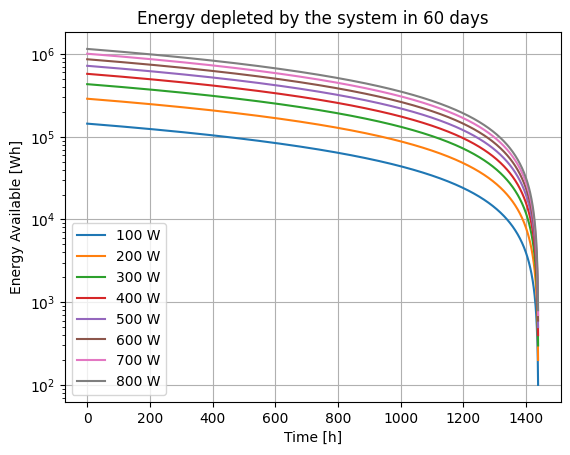

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Total Volume:      1200 l
Batteries required by the system:
Total Volume (m3):      1.20
Single Battery Volume (m3): 0.000231
Single Battery Volume (l): 0.230907
Single Battery Energy Density (Wh): 27.708847
Single Battery Mass (kg): 0.277088
Number of batteries: 5196
Theoretical total Weight (kg): 1440.0 kg
Total Volume:      2400 l
Batteries required by the system:
Total Volume (m3):      2.40
Single Battery Volume (m3): 0.000231
Single Battery Volume (l): 0.230907
Single Battery Energy Density (Wh): 27.708847
Single Battery Mass (kg): 0.277088
Number of batteries: 10393
Theoretical total Weight (kg): 2880.0 kg
Total Volume:      3600 l
Batteries required by the system:
Total Volume (m3):      3.60
Single Battery Volume (m3): 0.000231
Single Battery Volume (l): 0.230907
Single Battery Energy Density (Wh): 27.708847
Single Battery Mass (kg): 0.277088
Number of batteries: 15590
Theoretical total Weight (kg): 4320.0 kg
Total Volume:      4800 l
Batteries required by the system:
Total Vo

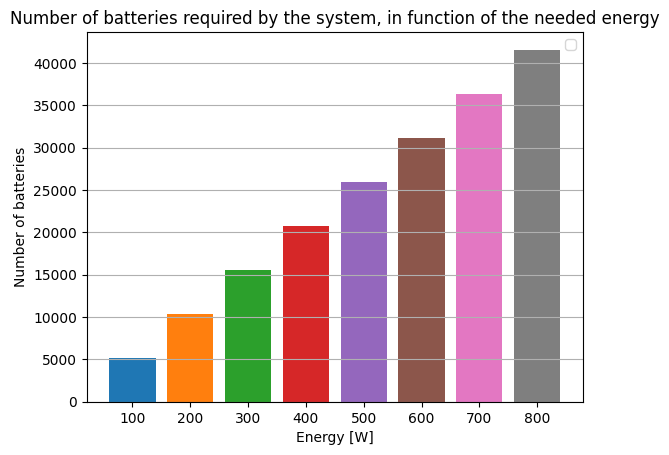

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import numpy

# =============================================================================
#                                   CONSTANTS
# =============================================================================

# Information obtained from: Energy Storage Technologies for Future Planetary Science Missions.
SPECIFIC_ENERGY = 100   # Wh/kg
ENERGY_DENSITY = 120    # Wh/l

DAY60_TO_HOURS = 60 * 24  # h

# =============================================================================
#                                   FUNCTIONS
# =============================================================================

def totalEnergyConsumed(energy_list: list[str]) -> list[str]:
    total_energy = []
    for idx, energy in enumerate(energy_list):
        print("==============================================================")
        print("Energy demand of the system: %d W" % energy)
        
        # Calculations
        total_mass = (energy * DAY60_TO_HOURS)/SPECIFIC_ENERGY
        print("Battery Pack Mass: %.2f kg" % total_mass)

        total_energy.append(SPECIFIC_ENERGY * total_mass)
        print("Total Energy:      %d Wh" % total_energy[idx])

        # Plotting
        x = list(range(0, DAY60_TO_HOURS))
        y = list(range(int(total_energy[idx]), 0, -energy))

        plt.plot(x, y, label = "%d W" % energy)
    
    plt.yscale('log')
    plt.xlabel('Time [h]')
    plt.ylabel('Energy Available [Wh]')
    plt.title('Energy depleted by the system in 60 days')
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.clf()

    return total_energy

def totalNumOfBatteries(total_energy_list: list[str], energy_list: list[str]):
    battery_qty = []
    for idx, total_energy in enumerate(total_energy_list):
        total_volume = total_energy / ENERGY_DENSITY
        print("Total Volume:      %d l" % total_volume)

        # Calculus for Batteries units to be used
        # Taking as a reference from the document: https://ntrs.nasa.gov/api/citations/19970013741/downloads/19970013741.pdf, page 7
        LENGTH = 0.24       # m
        RADIUS = 0.035/2    # m

        print("Batteries required by the system:")
        
        total_volume_in_m3 = total_volume / 1000
        print("Total Volume (m3):      %.2f" % total_volume_in_m3)
        
        battery_volume_in_m3 = numpy.pi * pow(RADIUS, 2) * LENGTH
        print("Single Battery Volume (m3): %f" % battery_volume_in_m3)

        battery_volume_in_l = battery_volume_in_m3 * 1000
        print("Single Battery Volume (l): %f" % battery_volume_in_l)

        battery_energy_density = battery_volume_in_l * ENERGY_DENSITY
        print("Single Battery Energy Density (Wh): %f" % battery_energy_density)

        battery_mass = battery_energy_density / SPECIFIC_ENERGY
        print("Single Battery Mass (kg): %f" % battery_mass)

        battery_qty.append(total_volume_in_m3 / battery_volume_in_m3)
        print("Number of batteries: %d" % battery_qty[idx])

        theoretical_battery_weight = battery_qty[idx] * battery_mass
        print(f"Theoretical total Weight (kg): {theoretical_battery_weight} kg")

    energy_list_str = [str(value) for value in energy_list]
    plt.bar(energy_list_str, battery_qty, color=[u'#1f77b4', u'#ff7f0e', 
                                                 u'#2ca02c', u'#d62728', 
                                                 u'#9467bd', u'#8c564b', 
                                                 u'#e377c2', u'#7f7f7f', 
                                                 u'#bcbd22', u'#17becf'])
    plt.xlabel('Energy [W]')
    plt.ylabel('Number of batteries')
    plt.title('Number of batteries required by the system, in function of the needed energy')
    plt.grid(axis='y')
    plt.legend()
    plt.show()
    plt.clf()

# =============================================================================
#                                     PLOTS
# =============================================================================

# CASE 1:
ENERGY_CONSUMPTION_PER_HOUR = range(100, 900, 100)

# Total Energy Consumed
total_energy_consumed = totalEnergyConsumed(list(ENERGY_CONSUMPTION_PER_HOUR))

# Total Number of Batteries
totalNumOfBatteries(total_energy_consumed, list(ENERGY_CONSUMPTION_PER_HOUR))

# Total Mass of the Battery Pack

In [ ]:
# plot_result(model_name,
#             "Accuracy",
#             "Scores de 'Accuracy' para las 5 validaciones",
#             Log_Reg_results["Training Accuracy scores"],
#             Log_Reg_results["Validation Accuracy scores"])